# Projeto I - SQL

## Datasets

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### Pergunta 1: Quais países possuem mais faturas?

#### SQL

```SQL
SELECT
    BillingCountry,
    COUNT(*) AS Invoices
FROM Invoice
GROUP BY 1
ORDER BY 2 DESC;
```

Seleciona cada país de pagantes e conta quantas compras existem naquela região, agrupando pelo país e ordenando pela região do maior número de vendas para o menor.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
BillingCountry    24 non-null object
Invoices          24 non-null int64
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes


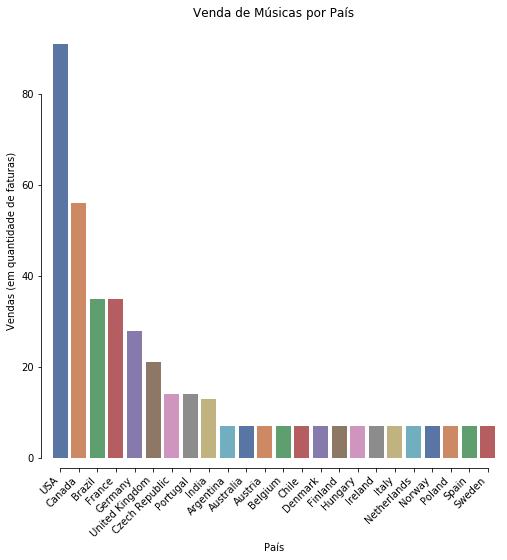

In [3]:
df_1 = pd.read_csv('csv/query-1.csv')
df_1.info()
df_1.head()


fig, ax = plt.subplots(figsize=(8,8))
g = sns.barplot(x='BillingCountry', y='Invoices', data=df_1, ax=ax, palette="deep")
sns.despine(offset=10, trim=True)
plt.setp(g.get_xticklabels(), rotation=45,  ha="right")
g.set_xlabel('País')
g.set_ylabel('Vendas (em quantidade de faturas)')
g.set_title('Venda de Músicas por País')
s = g.get_figure()
s.savefig('img/fig1.png');

### Pergunta 1-2: Faturas por cidade dentro do país com maior número de faturas.

#### SQL

```SQL
WITH top_country AS (
    SELECT
    BillingCountry,
    COUNT(*) AS Invoices
    FROM Invoice
    GROUP BY 1
    ORDER BY 2 DESC
    LIMIT 1
)

SELECT
    COUNT(*) AS Invoices,
    inv.BillingCity
FROM Invoice AS inv
JOIN top_country AS tc
ON inv.BillingCountry = tc.BillingCountry
GROUP BY 2
ORDER BY 1 DESC;
```

Criada uma tabela temporaria com nome *top_country* com o país com maior número de faturas, dessa fez-se uma seleção e contagem de fatura em cada cidade naquele país, ordenando do maior para o menor.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 2 columns):
Invoices       12 non-null int64
BillingCity    12 non-null object
dtypes: int64(1), object(1)
memory usage: 272.0+ bytes


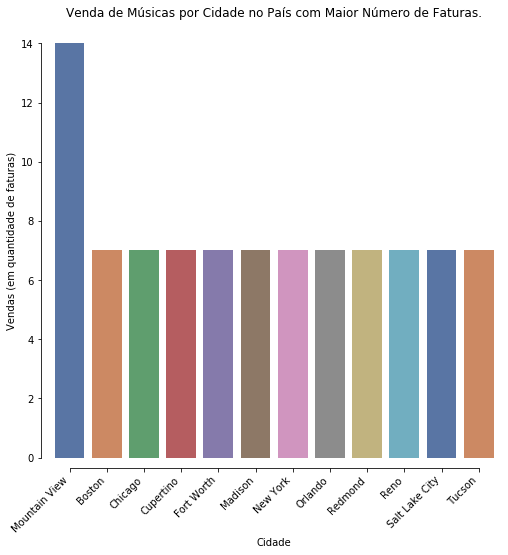

In [5]:
df_1_2 = pd.read_csv('csv/query-1-2.csv')
df_1_2.info()
df_1_2.head()


fig, ax = plt.subplots(figsize=(8,8))
g = sns.barplot(x='BillingCity', y='Invoices', data=df_1_2, ax=ax, palette="deep")
sns.despine(offset=10, trim=True)
plt.setp(g.get_xticklabels(), rotation=45,  ha="right")
g.set_xlabel('Cidade')
g.set_ylabel('Vendas (em quantidade de faturas)')
g.set_title('Venda de Músicas por Cidade no País com Maior Número de Faturas.')
s = g.get_figure()
s.savefig('img/fig1-2.png');

### Pergunta 2: Qual cidade tem os melhores clientes?

#### SQL

```SQL

SELECT
    BillingCity,
    SUM(Total) AS city_total
FROM Invoice
GROUP BY 1
ORDER BY 2 DESC
LIMIT 1;
```

Consulta utiliza da cidade de compra e soma o total do valores de faturas, agrupando pelas cidades os totais e ordenando pela cidade com maior somatoria de pagamentos.

In [3]:
df_2 = pd.read_csv('csv/query-2.csv')
df_2.info()
df_2.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 2 columns):
BillingCity    1 non-null object
city_total     1 non-null float64
dtypes: float64(1), object(1)
memory usage: 96.0+ bytes


,BillingCity,city_total
0,Prague,90.24


### Pergunta 3: Quem é o melhor cliente?

#### SQL

```SQL
SELECT
    cus.CustomerId,
    cus.FirstName || ' ' || cus.LastName AS full_name,
    SUM(inv.Total) AS total_usd
FROM Customer AS cus
JOIN Invoice as inv
ON inv.CustomerId == cus.CustomerId
GROUP BY 1
ORDER BY 3 DESC
LIMIT 1;
```

Nessa consulta, somamos o total de compras de cada cliente, agrupamos os totais pelo identificador do cliente e ordenamos do maior total ao menor limitando apenas ao maior total de compras.

In [4]:
df_3 = pd.read_csv('csv/query-3.csv')
df_3.info()
df_3.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 3 columns):
CustomerId    1 non-null int64
full_name     1 non-null object
total_usd     1 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 104.0+ bytes


,CustomerId,full_name,total_usd
0,6,Helena Holý,49.62


### Pergunta 4: Use sua consulta para retornar o e-mail, nome, sobrenome e gênero de todos os ouvintes de Rock. Retorne sua lista ordenada alfabeticamente por endereço de e-mail, começando por A. Você consegue encontrar um jeito de lidar com e-mails duplicados para que ninguém receba vários e-mails?

#### SQL

```SQL
SELECT
    cus.Email,
    cus.FirstName,
    cus.LastName,
    gen.Name AS genre_music
FROM Customer AS cus
JOIN Invoice AS inv
ON inv.CustomerId = cus.CustomerId
JOIN InvoiceLine AS inl
ON inl.InvoiceId = inv.InvoiceId
JOIN Track AS tr
ON tr.TrackId == inl.TrackId
JOIN Genre AS gen
ON tr.GenreId = gen.GenreId
WHERE gen.Name = 'Rock'
GROUP BY 1
ORDER BY 1;
```

Esta pesquisa retorna todos os ouvintes do gênero *Rock* através da junção de outras tabelas, agrupando estas por e-mail e ordenando por e-mail em ordem alfabética.

In [5]:
df_4 = pd.read_csv('csv/query-4.csv')
df_4.info()
df_4.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 4 columns):
Email          59 non-null object
FirstName      59 non-null object
LastName       59 non-null object
genre_music    59 non-null object
dtypes: object(4)
memory usage: 1.9+ KB


,Email,FirstName,LastName,genre_music
0,aaronmitchell@yahoo.ca,Aaron,Mitchell,Rock
1,alero@uol.com.br,Alexandre,Rocha,Rock
2,astrid.gruber@apple.at,Astrid,Gruber,Rock
3,bjorn.hansen@yahoo.no,Bjørn,Hansen,Rock
4,camille.bernard@yahoo.fr,Camille,Bernard,Rock


### Pergunta 5: Quem está escrevendo as músicas de rock?

#### SQL

```SQL
SELECT
    art.ArtistId,
    art.Name,
    COUNT(*) AS Songs
FROM Artist AS art
JOIN Album AS alb
ON alb.ArtistId = art.ArtistID
JOIN Track AS tr
ON tr.AlbumId = alb.AlbumId
JOIN Genre AS gen
ON tr.GenreId = gen.GenreId
WHERE gen.Name = 'Rock'
GROUP BY art.Name
ORDER BY 3 DESC
LIMIT 10;
```

Retorna uma listagem com o nome dos artistas que estão escrevendo músicas de rock através da busca do gênero musical *Rock* por meio da junção das tabelas de Artista, Álbum e Gênero.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 3 columns):
ArtistId    51 non-null int64
Name        51 non-null object
Songs       51 non-null int64
dtypes: int64(2), object(1)
memory usage: 1.3+ KB


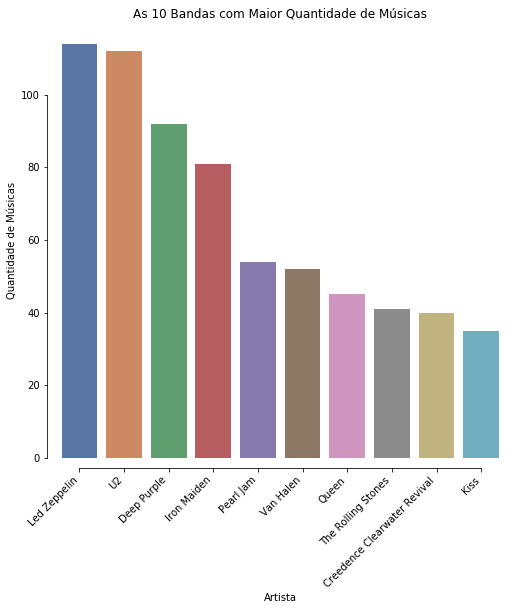

In [6]:
df_5 = pd.read_csv('csv/query-5.csv')
df_5.info()
df_5.head()

fig, ax = plt.subplots(figsize=(8,8))
g = sns.barplot(x='Name', y='Songs', data=df_5.iloc[:10], ax=ax, palette="deep")
sns.despine(offset=10, trim=True)
plt.setp(g.get_xticklabels(), rotation=45,  ha="right")
g.set_xlabel('Artista')
g.set_ylabel('Quantidade de Músicas')
g.set_title('As 10 Bandas com Maior Quantidade de Músicas')
s = g.get_figure()
s.savefig('img/fig2.png');

### Pergunta 6 Parte 1: Primeiro, descubra qual artista ganhou mais de acordo com InvoiceLines (linhas de faturamento).


#### SQL

```SQL
SELECT
    art.Name,
    SUM(inl.Quantity * inl.UnitPrice) AS AmountSpent
FROM Artist AS art
JOIN Album AS alb
ON alb.ArtistId = art.ArtistId
JOIN Track AS tr
ON tr.AlbumId = alb.AlbumId
JOIN InvoiceLine AS inl
ON inl.TrackId = tr.TrackId
GROUP BY 1
ORDER BY 2 DESC
LIMIT 1;
```

Por meio da junção das tabelas Artistas, Álbum, Trilha e Pedidos calcula a somatória de valores gastos em música gastos por artista, agrupando pelo nome do artista e ordenando do maior para a menor quantidade gasta e selecionando apenas o artista que mais vendeu.

In [7]:
df_6_1 = pd.read_csv('csv/query-6-1.csv')

df_6_1.info()

df_6_1.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 2 columns):
Name           1 non-null object
AmountSpent    1 non-null float64
dtypes: float64(1), object(1)
memory usage: 96.0+ bytes


,Name,AmountSpent
0,Iron Maiden,138.6


### Pergunta 6 Parte 2: Agora encontre qual cliente gastou mais com o artista que você encontrou acima.

#### SQL

```SQL
WITH table_artist AS (
    SELECT
    art.Name,
    SUM(inl.Quantity * inl.UnitPrice) AS AmountSpent
    FROM Artist AS art
    JOIN Album AS alb
    ON alb.ArtistId = art.ArtistId
    JOIN Track AS tr
    ON tr.AlbumId = alb.AlbumId
    JOIN InvoiceLine AS inl
    ON inl.TrackId = tr.TrackId
    GROUP BY 1
    ORDER BY 2 DESC
    LIMIT 1
)

SELECT
    art.Name,
    SUM(inl.Quantity * inl.UnitPrice) AS AmountSpent,
    cus.CustomerId,
    cus.FirstName,
    cus.LastName
FROM Artist AS art
JOIN Album AS alb
ON alb.ArtistId = art.ArtistId
JOIN Track AS tr
ON tr.AlbumId = alb.AlbumId
JOIN InvoiceLine AS inl
ON inl.TrackId = tr.TrackId
JOIN Invoice AS inv
ON inl.InvoiceId = inv.InvoiceId
JOIN Customer AS cus
ON inv.CustomerId = cus.CustomerId
WHERE art.Name = (
    SELECT
        Name
    FROM table_artist
)
GROUP BY 3
ORDER BY 2 DESC;
```

Com a utilização da seleção da parte 1 da tarefa, é gerada uma nova tabela temporária de nome table_artist contendo o artista que mais vendeu. Faz-se uma nova busca pelas pessoas que mais compraram música desse artista, e calcula a quantidade gasta naquela banda, sendo ordenado do maior para o menor.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 5 columns):
Name           27 non-null object
AmountSpent    27 non-null float64
CustomerId     27 non-null int64
FirstName      27 non-null object
LastName       27 non-null object
dtypes: float64(1), int64(1), object(3)
memory usage: 1.1+ KB


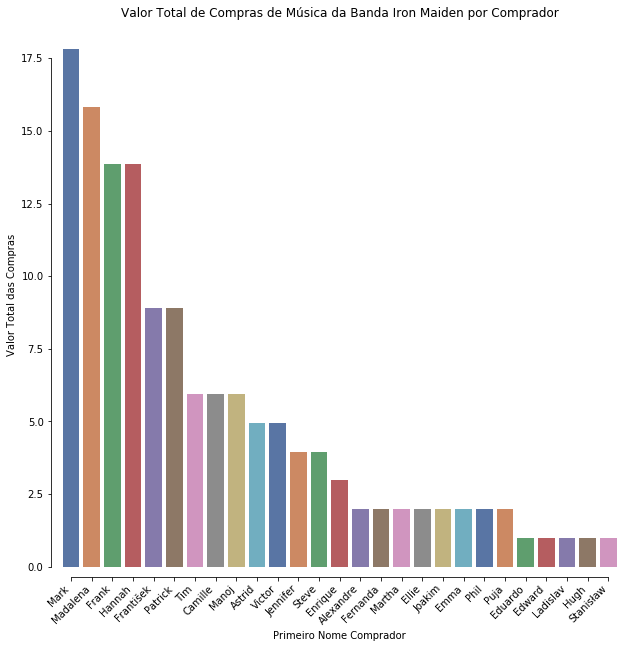

In [8]:
df_6_2 = pd.read_csv('csv/query-6-2.csv')

df_6_2.info()

df_6_2.head()

fig, ax = plt.subplots(figsize=(10,10))
g = sns.barplot(x='FirstName', y='AmountSpent', data=df_6_2, ax=ax, palette="deep")
sns.despine(offset=10, trim=True)
plt.setp(g.get_xticklabels(), rotation=45,  ha="right")
g.set_xlabel('Primeiro Nome Comprador')
g.set_ylabel('Valor Total das Compras')
g.set_title('Valor Total de Compras de Música da Banda Iron Maiden por Comprador')
s = g.get_figure()
s.savefig('img/fig3.png');

### Pergunta 7: Queremos descobrir o gênero musical mais popular em cada país. Determinamos o gênero mais popular como o gênero com o maior número de compras. Escreva uma consulta que retorna cada país juntamente a seu gênero mais vendido. Para países onde o número máximo de compras é compartilhado retorne todos os gêneros

#### SQL

```SQL
WITH purchases AS (
    SELECT
        COUNT(*) AS Purchases,
        cus.Country,
        gen.Name,
        gen.GenreId
    FROM Customer AS cus
    JOIN Invoice AS inv
    ON inv.CustomerId = cus.CustomerId
    JOIN InvoiceLine AS inl
    ON inl.InvoiceId = inv.InvoiceId
    JOIN Track AS trk
    ON trk.TrackId = inl.TrackId
    JOIN Genre AS gen
    ON gen.GenreId = trk.GenreID
    GROUP BY 2, 3
    ORDER BY 1 DESC
), max_pur AS (
    SELECT
        MAX(pur.Purchases) as max_pur,
        pur.Country
    FROM purchases AS pur
    GROUP BY pur.Country
)

SELECT
    pur.Purchases,
    pur.Country,
    pur.Name,
    pur.GenreId
FROM purchases AS pur
JOIN max_pur AS mpur
ON mpur.Country = pur.Country
AND mpur.max_pur = pur.Purchases
ORDER BY pur.Country;

```


Através de duas seleções são geradas duas tabelas onde a primeira conta a quantidade de compras por país e gênero, e o máximo que cada país teve em compras. É selecionado o gênero de música que teve a maior representação em cada país pela união dessas duas tabelas ao fazer a comparação entre elas.

In [9]:
df_7 = pd.read_csv('csv/query-7.csv')
df_7.info()
df_7.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 4 columns):
Purchases    25 non-null int64
Country      25 non-null object
Name         25 non-null object
GenreId      25 non-null int64
dtypes: int64(2), object(2)
memory usage: 880.0+ bytes


,Purchases,Country,Name,GenreId
0,9,Argentina,Alternative & Punk,4
1,9,Argentina,Rock,1
2,22,Australia,Rock,1
3,15,Austria,Rock,1
4,21,Belgium,Rock,1


### Pergunta 8: Retorne todos os nomes de músicas que possuem um comprimento de canção maior que o comprimento médio de canção.

### SQL

```SQL
WITH music_avg_time AS (
    SELECT
        AVG(Milliseconds) AS avg_time
    FROM Track
)

SELECT
    Name,
    Milliseconds
FROM Track
JOIN music_avg_time
WHERE Milliseconds > avg_time
ORDER BY 2 DESC
LIMIT 10;
```

Cria uma tabela temporária com a média de tempo das músicas e depois seleciona as músicas que possuam o tempo de duração maior do que a média geral ordenado do maior para o menor tempo.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494 entries, 0 to 493
Data columns (total 2 columns):
Name            494 non-null object
Milliseconds    494 non-null int64
dtypes: int64(1), object(1)
memory usage: 7.8+ KB


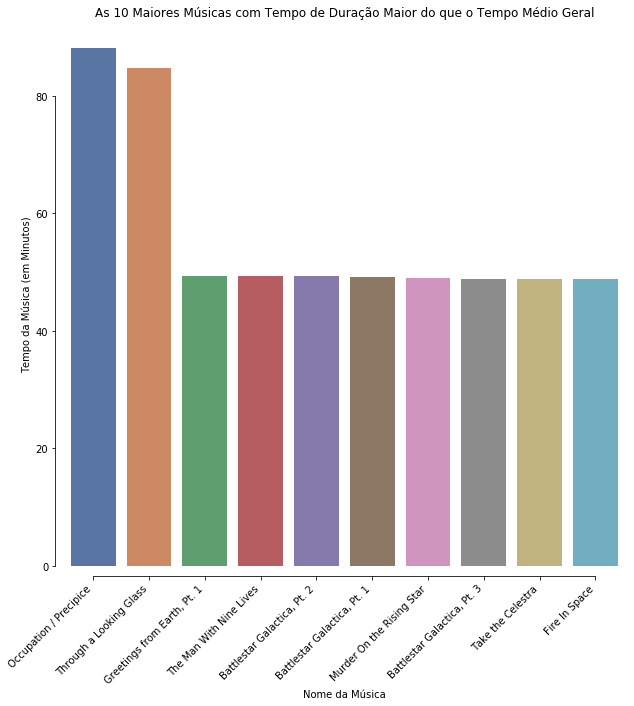

In [10]:
df_8 = pd.read_csv('csv/query-8.csv')
df_8.info()
df_8.head()

df_8['Milliseconds'] = df_8['Milliseconds'].apply(lambda x: x/1000/60)

fig, ax = plt.subplots(figsize=(10,10))
g = sns.barplot(x='Name', y='Milliseconds', data=df_8[:10], ax=ax, palette="deep")
sns.despine(offset=10, trim=True)
plt.setp(g.get_xticklabels(), rotation=45,  ha="right")
g.set_xlabel('Nome da Música')
g.set_ylabel('Tempo da Música (em Minutos)')
g.set_title('As 10 Maiores Músicas com Tempo de Duração Maior do que o Tempo Médio Geral')
s = g.get_figure()
s.savefig('img/fig4.png');

### Pergunta 9: Escreva uma consulta que determina qual cliente gastou mais em músicas por país. Escreva uma consulta que retorna o país junto ao principal cliente e quanto ele gastou. Para países que compartilham a quantia total gasta, forneça todos os clientes que gastaram essa quantia.

#### SQL

```SQL
WITH total_spend AS (
    SELECT
        cus.Country,
        SUM(inv.Total) AS TotalSpend,
        cus.FirstName,
        cus.LastName,
        cus.CustomerId
    FROM Customer AS cus
    LEFT JOIN Invoice AS inv
    ON inv.CustomerId = cus.CustomerId
    GROUP BY 5
), max_spend AS (
    SELECT
        MAX(ts.TotalSpend) as max_spend,
        ts.Country
    FROM total_spend AS ts
    GROUP BY 2
)

SELECT
    ts.Country,
    ts.TotalSpend,
    ts.FirstName,
    ts.LastName,
    ts.CustomerId
FROM total_spend AS ts
JOIN max_spend AS ms
ON ts.Country = ms.Country
AND ts.TotalSpend = ms.max_spend
ORDER BY 1;
```

Gera-se duas tabelas temporárias com a primeira tendo o Total gasto por país e a segunda o máximo gasto por país. Ao compara-las tem-se os maiores valores que o melhor cliente de cada país gastou em suas compras.

In [11]:
df_9 = pd.read_csv('csv/query-9.csv')
df_9.info()
df_9.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 5 columns):
Country       25 non-null object
TotalSpend    25 non-null float64
FirstName     25 non-null object
LastName      25 non-null object
CustomerId    25 non-null int64
dtypes: float64(1), int64(1), object(3)
memory usage: 1.1+ KB


,Country,TotalSpend,FirstName,LastName,CustomerId
0,Argentina,37.62,Diego,Gutiérrez,56
1,Australia,37.62,Mark,Taylor,55
2,Austria,42.62,Astrid,Gruber,7
3,Belgium,37.62,Daan,Peeters,8
4,Brazil,39.62,Luís,Gonçalves,1
